In [17]:
import GenerateModes
import TetradConvention

import lal
import matplotlib.pyplot as plt
import numpy as np

# Check tetrad convention example notebook

The idea is that the tetrad choice, in the form of the angle $\psi_0$, is encoded in the phase differences
between modes (see my slides from the waveform call: https://dcc.ligo.org/LIGO-G1802189 ).

$\Delta\phi_{lm,22}\equiv 2*\phi_{lm}(t)-m*\phi_{22}(t)\simeq\psi_0(2-m)$ with $\psi_0\in \{0,\pm\pi\}$

The functions to compute the phase offsets are in TetradConvention.py.

We provide also some wrappers in GenerateModes.py for generating the modes of SEOBNRv4HM, PhenomHM and LVCNR Catalog.

Of course, generic modes can be passed to the functions PhaseOffsetsTD and PhaseOffsetsFD.

# SEOBNRv4HM

Example of determining the tetrad for SEOBNRv4HM.

We use the predefined function in GenerateModes to get the modes.

You will need to load the review branch of SEOBNRv4HM.

In [2]:
SEOBmodelist = [[2,1],[2,2],[3,3],[4,4],[5,5]] # Important: this is the mode ordering of the output

times, modes = GenerateModes.SEOBNRv4HMmodes(Mtot=60., eta=0.1875, spin1_z=0., spin2_z=0.,
                              distance=60*lal.MRSUN_SI, deltaT=1./8192,f_start22=10.)

Let's plot the modes for being sure that they were loaded properly:

In [3]:
plt.plot(times,modes[0],label='21')
plt.plot(times,modes[1],label='22')
plt.plot(times,modes[2],label='33')
plt.plot(times,modes[3],label='44')
plt.plot(times,modes[4],label='55')
plt.legend()
plt.title('SEOBNRv4HM, q=3 non-spinning')
plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Let's compute and plot the phase offsets:

In [4]:
times, phoff = TetradConvention.PhaseOffsetsTD(modes, SEOBmodelist, times)

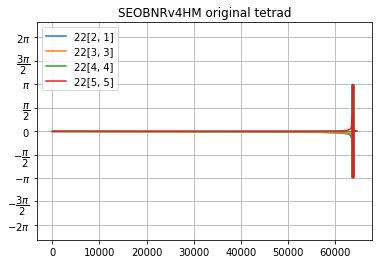

In [5]:
TetradConvention.PlotPhaseOffsets(times, phoff, SEOBmodelist, plotlabel='SEOBNRv4HM original tetrad')

Change to the other tetrad and plot it:

(Artifacts of taking module sometimes appear, but they are clearly identifiable because are 2Pi jumps.)

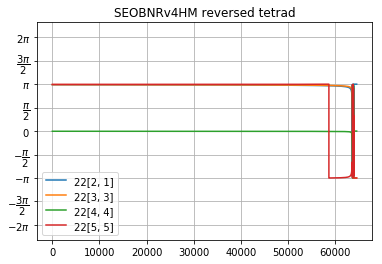

In [6]:
times, phoff = TetradConvention.PhaseOffsetsTD(modes, SEOBmodelist, times, tetrad=-1)
TetradConvention.PlotPhaseOffsets(times, phoff, SEOBmodelist, plotlabel='SEOBNRv4HM reversed tetrad')

# LVCNR Catalog

We use the predefined function in GenerateModes to get the modes from an LVCNRCatalog simulation

In [3]:
pathtosim = "/Users/hector/LVCNRCatalog/lvcnr-lfs/SXS/SXS_BBH_0030_Res5.h5" #Put the path to your favourite simulation

In [4]:
times, modes = GenerateModes.LVCNRmodes(filepath=pathtosim, mtotal=60.,
                                        distance=60*lal.MRSUN_SI/(1E6*lal.PC_SI),modelist=SEOBmodelist)
                                        # We choose to load the same modes as for SEOB

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


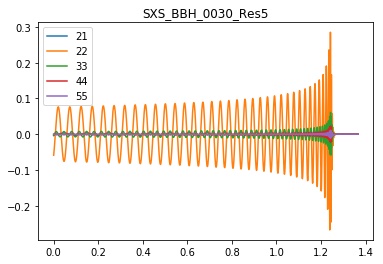

In [5]:
plt.plot(times,modes[0],label='21')
plt.plot(times,modes[1],label='22')
plt.plot(times,modes[2],label='33')
plt.plot(times,modes[3],label='44')
plt.plot(times,modes[4],label='55')
plt.legend()
plt.title('SXS_BBH_0030_Res5')
plt.show()

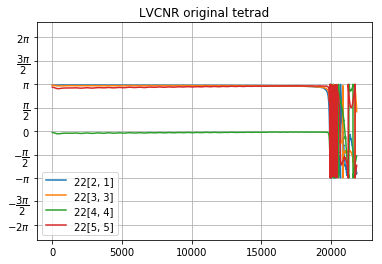

In [6]:
times, phoff = TetradConvention.PhaseOffsetsTD(modes, SEOBmodelist, times)
TetradConvention.PlotPhaseOffsets(times, phoff, SEOBmodelist, plotlabel='LVCNR original tetrad')

# PhenomHM

Currently, SEOBNRv4HM and PhenomHM are in different branches (the review branch of each model),
so if you loaded previously the SEOBNRv4HM review branch you will need to close the kernel, change the branch, and load again.

In [59]:
PHENmodelist = [[2,1],[2,2],[3,2],[3,3],[4,3],[4,4]]
freqs, modes = GenerateModes.PhenomHMmodes(Mtot=20.,eta=0.1875,s1z=0.,s2z=0.,deltaf=0.1,fmin=20.,fmax=800.,modelist=PHENmodelist)

In [60]:
plt.plot(freqs,modes[0],label='21')
plt.plot(freqs,modes[1],label='22')
plt.plot(freqs,modes[2],label='32')
plt.plot(freqs,modes[3],label='33')
plt.plot(freqs,modes[4],label='43')
plt.plot(freqs,modes[5],label='44')
plt.legend()
plt.title('PhenomHM q=3, s1=0, s2=0')
plt.show()

In [61]:
freqs,phoff = TetradConvention.PhaseOffsetsFD(modes,PHENmodelist,freqs)

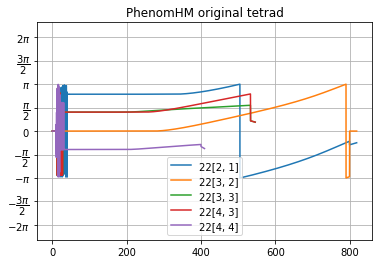

In [62]:
TetradConvention.PlotPhaseOffsets(freqs,phoff,PHENmodelist,plotlabel='PhenomHM original tetrad')

In frequency domain, the relation between the modes is only satisfied in the early inspiral (yo can observe that they are constant from 40 to 100 Hz more or less).

In this case is more difficult to establish which tetrad is following, but one can plot the expressions coming from the SPA:

$\Delta\Psi_{lm,22} = \pi(1-2/m)+\psi_0(1-2/m)$

In [67]:
pn2122 = np.full(len(freqs),-np.pi/4.)
pn3222 = np.full(len(freqs),0*np.pi/4.)
pn3322 = np.full(len(freqs),(1./3.)*np.pi/4.)
pn4322 = np.full(len(freqs),(1./3.)*np.pi/4.)
pn4422 = np.full(len(freqs),(1./2.)*np.pi/4.)

plt.plot(freqs,pn2122)
plt.plot(freqs,pn3222)
plt.plot(freqs,pn3322)
plt.plot(freqs,pn4322,linestyle='dashed')
plt.plot(freqs,pn4422)
plt.ylim(-np.pi/2,np.pi/2)
plt.yticks([-np.pi/2,0,np.pi/2],
               [r'$-\dfrac{\pi}{2}$','$0$',r'$\dfrac{\pi}{2}$'])
plt.title('$\psi_0=0$')
plt.show()

In [68]:
pn2122 = pn2122-np.pi*(1-2)
pn3222 = pn3222+np.pi*(1-1)
pn3322 = pn3322+np.pi*(1-2./3)
pn4322 = pn4322+np.pi*(1-2./3)
pn4422 = pn4422-np.pi*(1-1./2)

plt.plot(freqs,pn2122,label='2122')
plt.plot(freqs,pn3222,label='3222')
plt.plot(freqs,pn3322,label='3322')
plt.plot(freqs,pn4322,label='4322',linestyle='dashed')
plt.plot(freqs,pn4422,label='4422')
plt.ylim(-np.pi,np.pi)
plt.yticks([-np.pi/2,-np.pi,0,np.pi/2,np.pi],
               [r'$-\dfrac{\pi}{2}$',r'$-\pi$','$0$',r'$\dfrac{\pi}{2}$',r'$\pi$'])
plt.title('$\psi_0=\pm\pi$')
plt.legend()
plt.show()

It is easy to see that the convention follow by PhenomHM is the same as LVCNRCatalog, $\psi_0=\pm\pi$.

However, in frequency domain is trickier. As you can observe in the code, some times you use $\psi_0=+\pi$ and sometimes $\psi_0=-\pi$.